# FoodHub Exploratory Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [13]:
# Read the data
df = pd.read_csv('foodhub_order.csv')

# Returns the first 5 rows of the data
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [14]:
# Print the rows and columns present in the data
df.shape

#### Observations:
* The data have 1898 rows and 9 columns.

In [15]:
# Print the different data types within the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*  There are attributes of different types (int, float, object) in the data.
*  There are 5 numerical columns in the data and 4 object type columns.
*  We see that there are no missing values in the data since all the entries have the same amount of columns (1898).
*  The datatype of the rating column should be numerical but datatype object is observed.  This indicates that the column needs further investigation.

In [16]:
# Check there are no missing values in the data and treat them
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
*  There are no missing data in any of the columns.

In [17]:
# Print the statistical summary of the data on the relevant columns
df[['cost_of_the_order', 'food_preparation_time','delivery_time']].describe()

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000,1898.000,1898.000
mean,16.499,27.372,24.162
std,7.484,4.632,4.973
min,4.470,20.000,15.000
25%,12.080,23.000,20.000
50%,14.140,27.000,25.000
75%,22.297,31.000,28.000
max,35.410,35.000,33.000


#### Observations:
*  __cost_of_the_order__ :  The average order costs \\$16.50 with the order costs ranging from \\$4.47-\\$35.41 with a median cost of \\$14.14.  75% of the orders cost less than \\$22.30.  
*  __food_preparation_time__: The average amount of time it takes for food to be prepared once an order is placed is 27.4 minutes with preparation times ranging from 20-35 minutes and a median of 27 minutes.
*  __delivery_time__:         The delivery time ranges from 15-33 minutes with an average of 24.2 minutes.  The median delivery time is 25 minutes.
*  In the above columns the mean and medians are very close indicating that the data in these columns may be symmetrically distributed.    

In [18]:
# Determine how many orders are not rated
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
*  There are 736 orders out of 1898 that were not given a rating which accounts for about 40% of the data that is missing in the ratings column.
*  Of the orders that were rated, 30% of orders were given a 5 out of 5 rating, 20% of orders received 4 out of 5, and 10% of orders were given 3 out of 5.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

#### _Order id_

In [19]:
# Count the number of unique order id's
unique_orderid = df['order_id'].nunique()
print('There are ' + str(unique_orderid) + " unique order id's corresponding to the number of rows of data.")

There are 1898 unique order id's corresponding to the number of rows of data.


#### Observations:
*  **order_id**: There are 1898 unique order id's corresponding to the number of rows in the data.  Therefore, there is no trend in the order id as evidenced by the plot that shows a uniform distribution.  

#### _Customer id_

In [20]:
# Count the number of unique customer_id's
unique_custid = df['customer_id'].nunique()
print('There are ' + str(unique_custid) + " unique customer id's.\n")

# Determine the top 20 most frequent customers and sort most frequent to least frequent
print("Most frequent customers \t Number of Orders")
df['customer_id'].value_counts()[:20].sort_values(ascending=False)

There are 1200 unique customer id's.

Most frequent customers 	 Number of Orders


52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
275689     6
115213     6
60052      6
107909     6
97991      6
97079      6
301032     5
241719     5
97806      5
142461     5
94152      5
232035     5
Name: customer_id, dtype: int64

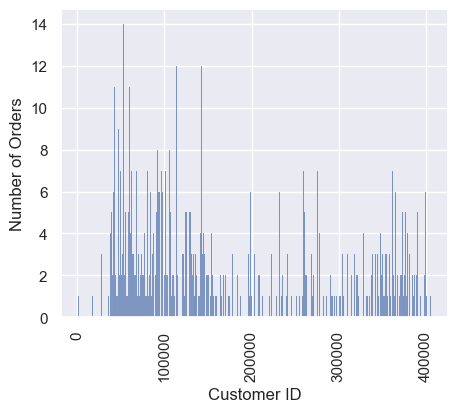

In [21]:
# Plot the frequency of customer id's
sns.set(rc={"figure.figsize":(5, 4)})
sns.histplot(data=df, x='customer_id', bins=1200)
plt.xticks(rotation=90)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
* There are 1200 unique customer id's.
* Some customers have only placed 1 order while other customers have placed up to 13 orders.

#### _Restaurant Name_

In [22]:
# Count and print the number of unique restaurant names
unique_rest      = df['restaurant_name'].nunique()     # number of unique restaurant names
unique_rest_name = df['restaurant_name'].unique()      # names of restaurants
print('There are ' + str(unique_rest) + " unique restaurant names:\n")
print(unique_rest_name)

There are 178 unique restaurant names:

['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin Burger'
 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill $1.99 Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "Sarabeth's East" 'Hill Country Fried Chicken' 'Bistango'
 "Jack's Wife Freda" "Mamoun's Falafel" 'Prosperity Dumpling'
 'Blue Ribbon Sushi Bar & Grill' 'Westville Hudson' 'Blue Ribbon Brooklyn'
 'Nobu Next Door' 'Osteria Morini' 'Haandi' 'Benihana' 'Han Dynasty'
 'Chote Nawab' 'Mission Cantina'

In [23]:
# Determine the top 20 most popular restaurants and sort by number of orders
print('Most popular restaurants \t Number of Orders')
df['restaurant_name'].value_counts()[:20].sort_values(ascending=False)

Most popular restaurants 	 Number of Orders


Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Nobu Next Door                    42
Rubirosa                          37
Sushi of Gari 46                  37
Momoya                            30
Five Guys Burgers and Fries       29
Blue Ribbon Sushi Izakaya         29
Bareburger                        27
Tamarind TriBeCa                  27
Jack's Wife Freda                 25
Sushi of Gari Tribeca             24
Name: restaurant_name, dtype: int64

In [24]:
# Determine the top 20 least popular restaurants and sort by number of orders
print('Least popular restaurants \t Number of Orders')
df['restaurant_name'].value_counts().sort_values(ascending=True)

Least popular restaurants 	 Number of Orders


'wichcraft                     1
Woorijip                       1
Kori Restaurant and Bar        1
Coppola's East                 1
Galli Restaurant               1
                            ... 
Parm                          68
Blue Ribbon Fried Chicken     96
Blue Ribbon Sushi            119
The Meatball Shop            132
Shake Shack                  219
Name: restaurant_name, Length: 178, dtype: int64

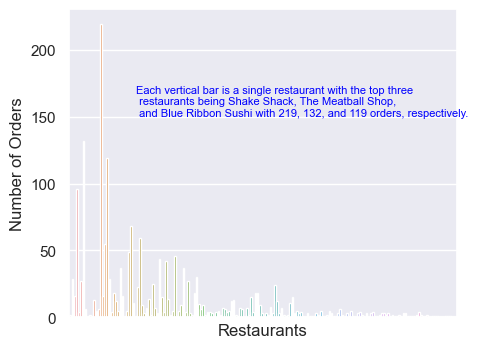

In [25]:
#  Plot number of orders versus restaurants
sns.countplot(data=df,x='restaurant_name')
plt.xlabel('Restaurants')
plt.ylabel('Number of Orders')
plt.gca().set_xticks([])  # remove x ticks since the ticks and names all run together
plt.gca().text(30, 150, "Each vertical bar is a single restaurant with the top three\n restaurants being Shake Shack, The Meatball Shop, \n and Blue Ribbon Sushi with 219, 132, and 119 orders, respectively.", fontsize=8, color='blue')
plt.show()

#### Observations:
* There are 178 unique restaurant names.
* Shake Shack is the most popular restaurant with 219 purchases while restaurants such as wichcraft, Woorijip, Kori Restaurant and Bar received only 1 order.  Other popular restaurants include The Meatball Shop with 132 purchases and Blue Ribbon Sushi with 119 purchases.

#### _Cuisine Type_

In [26]:
# Count and print the number of unique cuisine types
unique_cuis      = df['cuisine_type'].nunique()   # number of unique cuisine types
unique_cuis_name = df['cuisine_type'].unique()    # names of cuisine types
print('There are ' + str(unique_cuis) + " different types of cuisine:\n")
print(unique_cuis_name)

There are 14 different types of cuisine:

['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


In [27]:
# Determine the most popular cuisine type and sort by number of orders
print("Cuisine type \t Number of Orders")
df['cuisine_type'].value_counts().sort_values(ascending=False)

Cuisine type 	 Number of Orders


American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

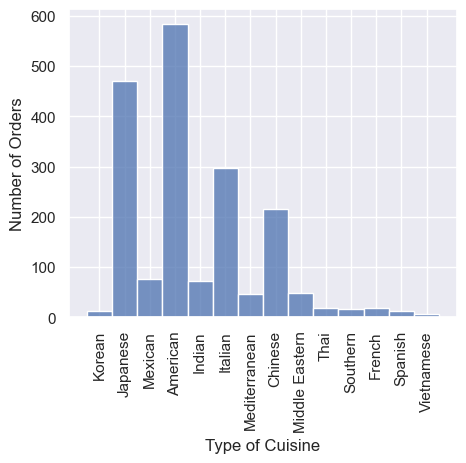

In [28]:
# Plot of number of orders versus cuisine types
sns.histplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.xlabel('Type of Cuisine')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
*  American food is the most popular cuisine type with 584 orders while Japanese and Italian are also popular choices.  The least popular choices include cuisine types such as Vietnamese, Spanish, and Korean.

#### _Cost of the Order_

In [29]:
# Determine the range of order costs
print("Order cost:")
df['cost_of_the_order'].sort_values(ascending=False)

Order cost:


573    35.410
1646   34.190
1762   33.370
1831   33.370
1370   33.320
        ...  
82      4.750
1569    4.750
542     4.710
480     4.660
624     4.470
Name: cost_of_the_order, Length: 1898, dtype: float64

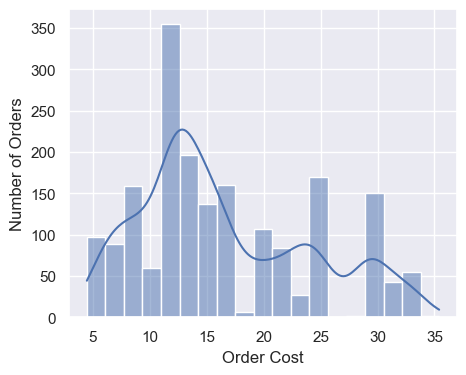

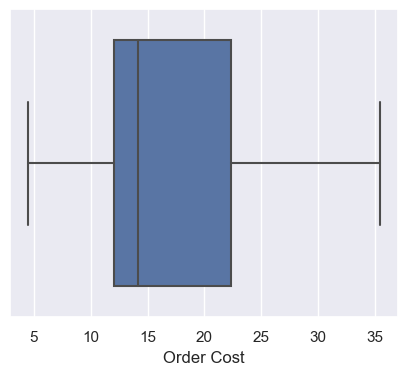

In [30]:
# Plot a histogram of the order cost
sns.histplot(data=df,x='cost_of_the_order', kde=True)
plt.xlabel('Order Cost')
plt.ylabel('Number of Orders')
plt.show()

# Plot a boxplot of the order cost
sns.boxplot(data=df,x='cost_of_the_order')
plt.xlabel('Order Cost')
plt.show()

#### Observations:
* The cost of the order ranges from 4.47-35.41 with a median order cost of 14.14 and an average cost of 16.49.
* The data distribution is right skewed with no outliers.

#### _Day of the Week_

In [31]:
# Determine the number of orders on the weekend and weekday
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

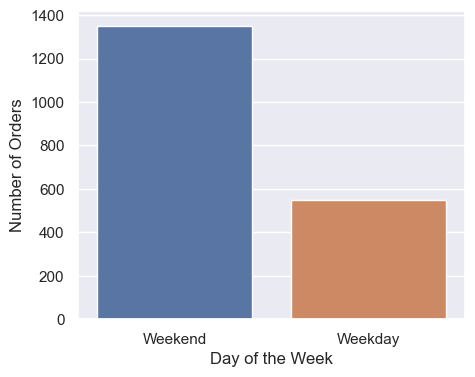

In [32]:
# Plot to compare the number of orders on the weekend vs. weekday
sns.countplot(data=df,x='day_of_the_week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
*  There are 2.5 times more orders on the weekend than during week.

#### _Rating_

In [33]:
# Count how many of each rating are in the ratings column
df['rating'].value_counts().sort_values(ascending=False)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

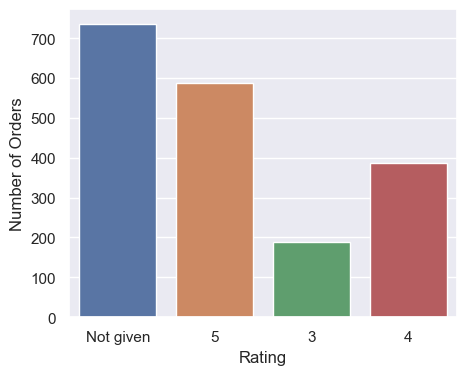

In [34]:
# Plot to compare the ratings
sns.countplot(data=df,x='rating')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
* About 40% of orders were not given a rating
* Of the available data for ratings, the ratings are skewed left with:
    * 30% of orders rated 5 out of 5,
    * 20% of orders rated 4 out of 5,
    * 10% of orders rated 3 out of 5.

#### _Food Preparation Time_

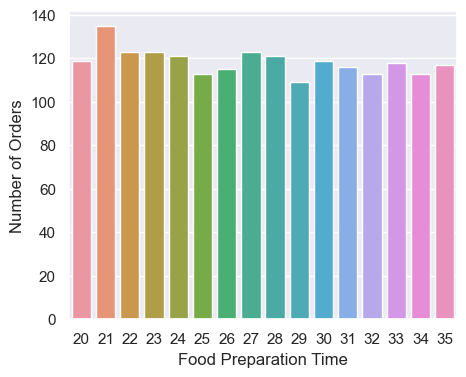

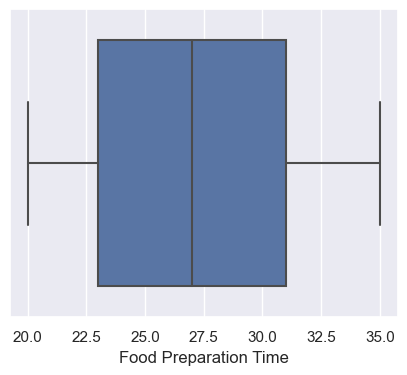

In [35]:
# Plot of number of orders versus food preparation time
sns.countplot(data=df,x='food_preparation_time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Number of Orders')
plt.show()

# Plot a boxplot of the food preparation time
sns.boxplot(data=df,x='food_preparation_time')
plt.xlabel('Food Preparation Time')
plt.show()

#### Observations:
*  Food preparation times range from 20-35 minutes with a median of 27 minutes and an average of 27.37 minutes.
*  The distribution of food preparation times is approximately symmetric and there are no outliers.

#### _Delivery Time_

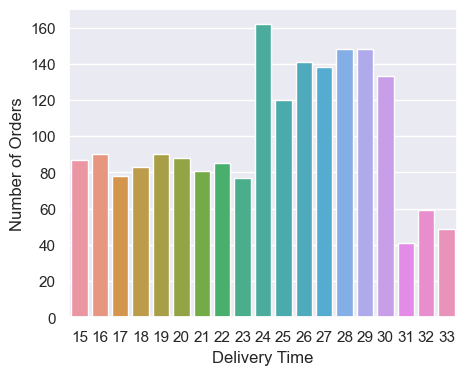

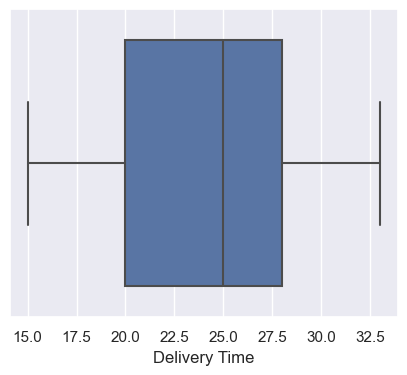

In [36]:
# Plot of number of orders versus delivery time
sns.countplot(data=df,x='delivery_time')
plt.xlabel('Delivery Time')
plt.ylabel('Number of Orders')
plt.show()

# Plot a boxplot of the delivery time
sns.boxplot(data=df,x='delivery_time')
plt.xlabel('Delivery Time')
plt.show()

#### Observations:
*  Delivery times range from 15-33 minutes with an average of 24.16 minutes and a median of 25 minutes.
*  The delivery time data are left skewed and there are no outliers.  

#### Which are the top 5 restaurants in terms of the number of orders received?

In [37]:
# Sort the top 5 restaurants according to the number of orders received
print("Top 5 Restaurants \t Number of Orders Received")
df['restaurant_name'].value_counts()[:5].sort_values(ascending=False)

Top 5 Restaurants 	 Number of Orders Received


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
* Shake Shack is the most popular restaurant with 219 orders received.  Other popular restaurants include The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and the least popular out of the top 5 is Parm which received 68 orders.


#### Which is the most popular cuisine on weekends?

In [38]:
# Group data by day
wkd_cuisine = df[df['day_of_the_week'] == 'Weekend']
print('Cuisine Type \t Number of Orders')
wkd_cuisine['cuisine_type'].value_counts()    # count the number of cuisine types

Cuisine Type 	 Number of Orders


American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
* American food is the most popular cuisine on the weekend which is not suprising since it is the most popular overall.
* Italian and Japanese are also popular choices on the weekend.
* Vitanamese is the least popular food choice on the weekend followed by Korean, Southern, and Spanish which were some of the least popular choices, also.

#### What percentage of the orders cost more than 20 dollars?

In [39]:
# Find the number of orders >$20 and compute the percentage
perc_over_20 = np.round(((df[df['cost_of_the_order']>20].shape[0])/df.shape[0])*100, decimals=2)

# Print the percentage of orders >$20
print(str(perc_over_20) + '% of orders cost more than $20.')

29.24% of orders cost more than $20.


#### Observations:
*  Approximately 30% of the orders cost more than \$20.

#### What is the mean order delivery time?

In [40]:
# Compute the mean order delivery time and round
mean_del_time = np.round(df['delivery_time'].mean(), decimals=1)

# Print the mean order delivery time
print('The mean order delivery time is '+str(mean_del_time) + ' minutes.')

The mean order delivery time is 24.2 minutes.


#### Observations:
* On average it takes 24 minutes for an order to be delivered.

In [41]:
# Determine the top 3 most frequent customers and display their ID's and number of orders
print("Customer ID \t  Number of Orders")
df['customer_id'].value_counts()[:3].sort_values(ascending=False) # count and sort values of top 3

Customer ID 	  Number of Orders


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
* The top customer placed 13 orders.

### Multivariate Analysis

### *Relationship between the Numerical Variables*

#### _Check Correlation of the Numerical Variables_

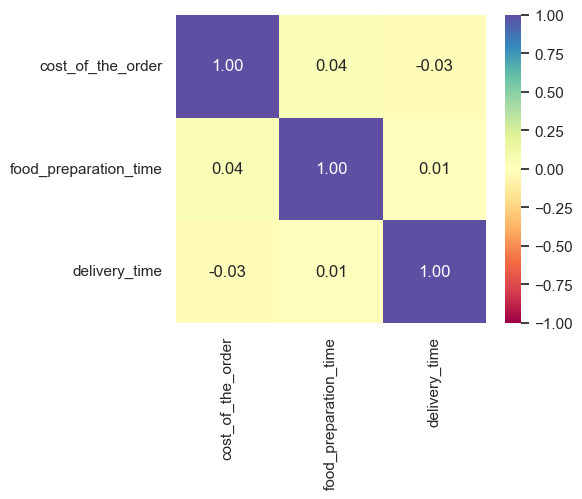

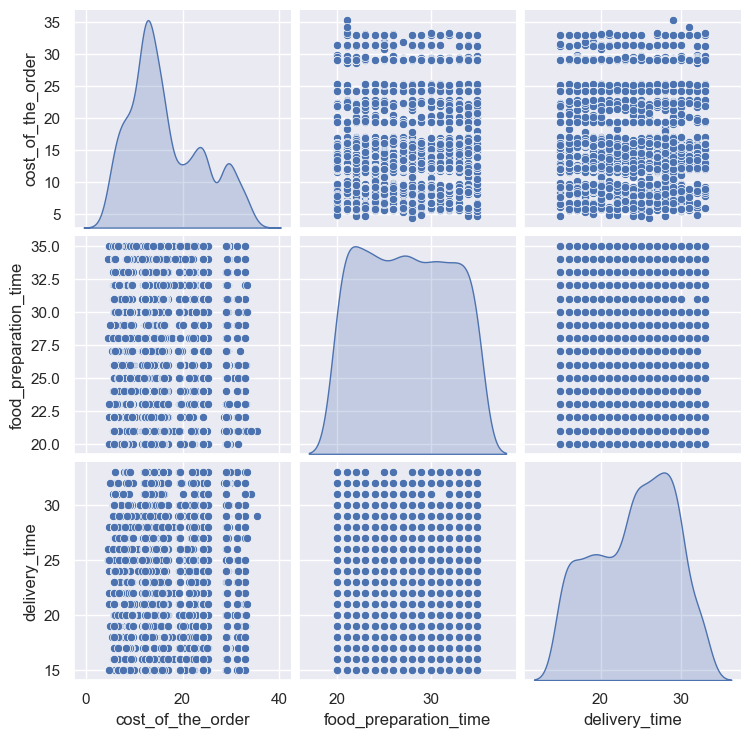

In [55]:
# Creat a list of the numerical variables
num = ['cost_of_the_order','food_preparation_time', 'delivery_time']

# Plot the correlation heat map
sns.heatmap(df[num].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# Plot a bivariate scatter plot
sns.pairplot(data=df[num], diag_kind="kde")
plt.show()

#### Observations:
*  Both plots demonstrate the same conclusion - that there is no strong relationship between the numerical variables.

### *Relationship between the Numerical and Categorical Variables*

#### _What are the most popular cuisine types on weekends and weekdays?_

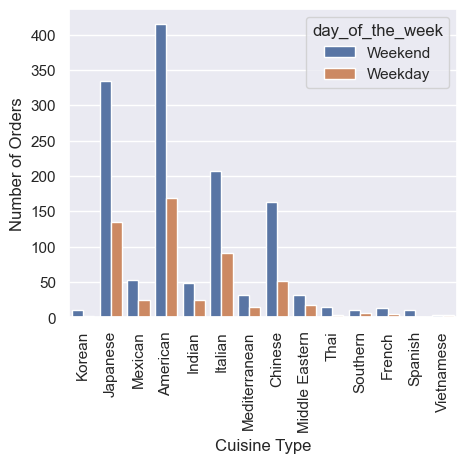

In [43]:
# Plot popularity of cuisine types according to the day of the week
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

#### Observations:
* In general, there are a higher number of orders on the weekend versus weekday
* American, Japanese, and Italian represent the highest number of orders of any day

#### _Assess the a relationship between day of the week and delivery and preparation times_

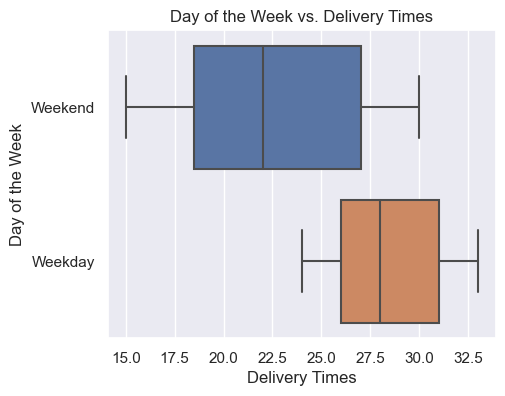

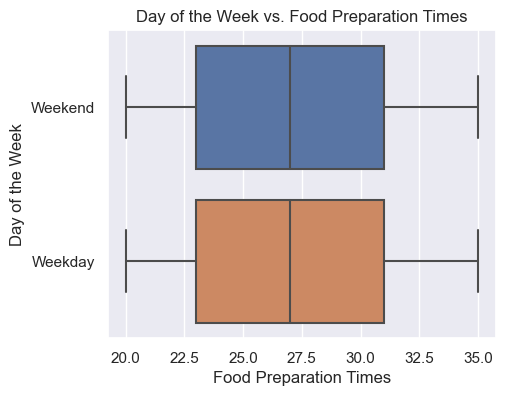

In [44]:
# Plot of day of the week versus delivery time
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week')
plt.title('Day of the Week vs. Delivery Times')
plt.xlabel('Delivery Times')
plt.ylabel('Day of the Week')
plt.show()

# Plot of day of the week versus food preparation time
sns.boxplot(data=df, x='food_preparation_time', y='day_of_the_week')
plt.title('Day of the Week vs. Food Preparation Times')
plt.xlabel('Food Preparation Times')
plt.ylabel('Day of the Week')
plt.show()

#### Observations:  
* There is a wider range of delivery times on the weekend versus the weekday.  
* At least 25% of the delivery times on the weekday are longer than all the delivery times on the weekend.
* There is no difference between the weekend or weekday as it relates to food preparation times.

#### _What is the relationship between cuisine type and food preparation times?_

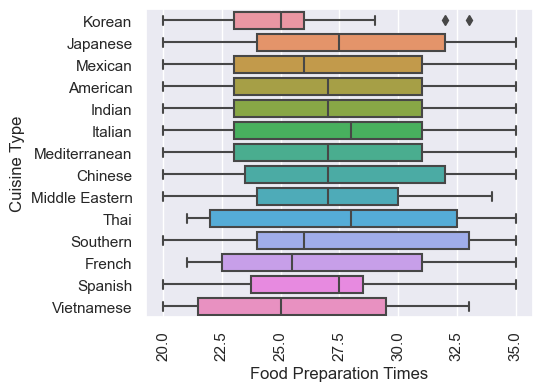

In [45]:
# Plot of food preparation times as it relates to type of cuisine
sns.boxplot(data=df, x= 'food_preparation_time', y='cuisine_type')
plt.xlabel('Food Preparation Times')
plt.ylabel('Cuisine Type')
plt.xticks(rotation=90)
plt.show()

#### Observations:
* The range of food preparation times for most cuisines are similar except for Korean which has a shorter maximum time, but Korean does have a few outliers.
* American, Indian, and Meditteranean have similar distributions.
* Thai and French have longer minimum food preparation times compared to other cuisines.
* Middle Eastern and Vietnamese have shorter maximum food preparation times compared to the other cuisines.

#### _What is the relationship between cuisine type and order cost?_

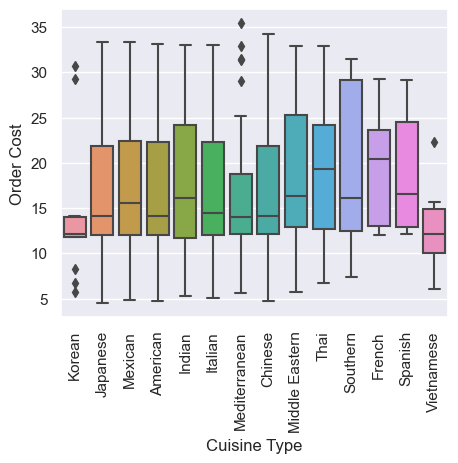

In [46]:
# Plot to compare cuisine type to order cost
sns.boxplot(data=df, x = 'cuisine_type', y = 'cost_of_the_order')
plt.xticks(rotation = 90)
plt.xlabel('Cuisine Type')
plt.ylabel('Order Cost')
plt.show()

#### Observations:
*  Korean, Mediterranean and Vietnamese cuisine types have significantly lower maximum costs compared to the range of other food types, but there are some outliers present.
*  In addition, French and Spanish also have a shorter range of cost compared to other food types, but their minimum cost is higher.

#### _What are the highest revenue generating restaurants?_

                 restaurant_name  cost_of_the_order
0                    Shake Shack           3579.530
1              The Meatball Shop           2145.210
2              Blue Ribbon Sushi           1903.950
3      Blue Ribbon Fried Chicken           1662.290
4                           Parm           1112.760
5               RedFarm Broadway            965.130
6                 RedFarm Hudson            921.210
7                            TAO            834.500
8                    Han Dynasty            755.290
9  Blue Ribbon Sushi Bar & Grill            666.620


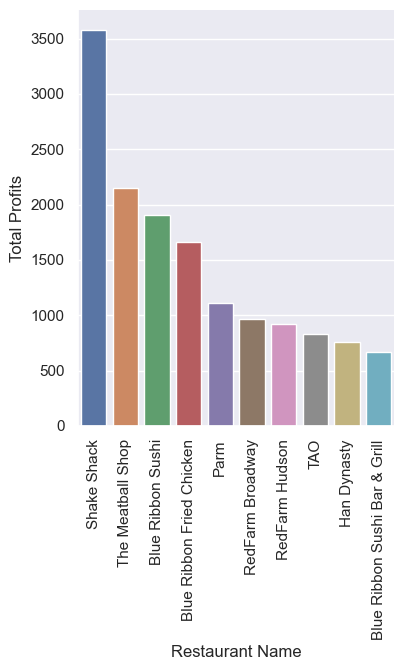

Shake Shack accounts for 11.0% of the total revenue.


In [59]:
# Determine the top 10 highest revenue-generating restaurants and compute their total revenue
highest_grossing10 = df.groupby('restaurant_name').sum(numeric_only=False)[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index().head(10)
print(highest_grossing10)

# Plot the top 10 highest revenue-generating restaurants and their total revenue
sns.catplot(data=highest_grossing10,x= 'restaurant_name', y='cost_of_the_order', kind='bar')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Profits')
plt.xticks(rotation=90)
plt.show()

# Determine the percentage of revenue for the most profitable restaurants
highest_grossing    = df.groupby('restaurant_name').sum(numeric_only=False)[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index()
total_grossing = highest_grossing['cost_of_the_order'].sum()
print('Shake Shack accounts for '+str(np.round((3579.53/total_grossing)*100)) +'% of the total revenue.')

#### Observations:
*  The top 3 highest revenue-generating restaurants are Shake Shack, The Meatball Shop, and Blue Ribbon Sushi.
*  Shake Shack acounts for 11% of the total revenue.

#### _What are the highest rated restaurants?_

             restaurant_name  rating
0                Shake Shack     133
1          The Meatball Shop      84
2          Blue Ribbon Sushi      73
3  Blue Ribbon Fried Chicken      64
4           RedFarm Broadway      41
5                       Parm      39
6             RedFarm Hudson      34
7                        TAO      28
8                   Rubirosa      24
9             Nobu Next Door      23


<Figure size 2000x600 with 0 Axes>

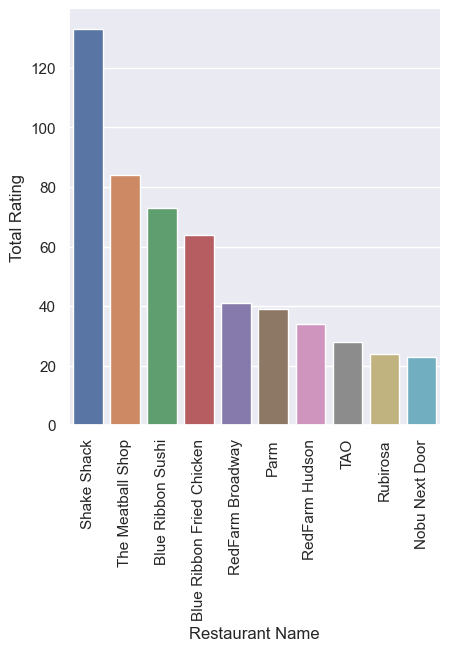

In [48]:
# Filter out orders that were not rated and set type to int
df_filtered           = df[df['rating'] != 'Not given'].copy()
df_filtered['rating'] = df_filtered['rating'].astype('int')

# Create new dataframe holding restaurant names and their ratings
df_rest = df_filtered.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

# Determine the top 10 highest rated restaurants
highest_rated = df_rest.groupby('restaurant_name').sum(numeric_only=False)[['rating']].sort_values('rating', ascending=False).reset_index().head(10)
print(highest_rated)

# Plot the top 10 highest rated restaurants
plt.figure(figsize=(20,6))
sns.catplot(data=highest_rated, x= 'restaurant_name', y='rating', kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name')
plt.ylabel('Total Rating')
plt.show()

#### Observations:
*  The top 3 highest rated restaurants include Shake Shack, The Meatball Shop, and Blue Ribbon Sushi.

#### _How does rating relate to delivery and preparation times?_

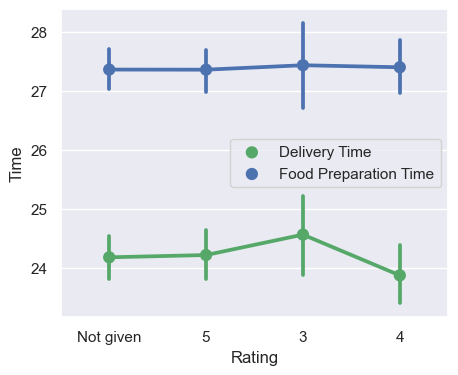

In [49]:
# Plot of delivery and preparation times versus rating
sns.pointplot(data=df, x='rating', y='delivery_time', color='g', label='Delivery Time')
sns.pointplot(data=df, x='rating', y='food_preparation_time', label='Food Preparation Time')
plt.xlabel('Rating')
plt.ylabel('Time')
plt.legend()
plt.show()

#### Observations:
*  Food preparation times are longer than delivery times, in general.
*  A rating of 3 out of 5 is associated with a wider range of delivery and food preparation times.
*  Furthermore, longer delivery and preparation times received a 3 out of 5 rating compared to the 4 and 5 out 5 ratings and the "Not given" rating.
*  As rating increases the range of delivery and preparation times decreases.  
*  The "Not given" ratings are similar in distribution to the 5 out of 5 rating for both the delivery and preparation times.


#### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [50]:
# Filter out orders that were not rated and set type to int
df_filtered           = df[df['rating'] != 'Not given'].copy()
df_filtered['rating'] = df_filtered['rating'].astype('int')

# Create new dataframe holding restaurant names and their ratings
df_rest = df_filtered.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

#  Locate restaurants that have rating counts >50
df_gt50 = df_rest[df_rest['rating'] > 50]['restaurant_name']

# Filter out restaurants with ratings >50
df_gt4avg = df_filtered[df_filtered['restaurant_name'].isin(df_gt50)].copy()

# Print out the restaurants with ratings >50 and average rating >4 to receive promo
print('These restaurants should receive the promotional offer:')
df_gt4avg.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

These restaurants should receive the promotional offer:


,restaurant_name,rating
0,The Meatball Shop,4.512
1,Blue Ribbon Fried Chicken,4.328
2,Shake Shack,4.278
3,Blue Ribbon Sushi,4.219


#### Observations:
*  The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi all have rating counts >50 and average ratings >4 and should receive the promotional offer.


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Determine the net revenue generated by the company across all orders. 

In [51]:
# Create new dataframe with cost only
df_cost = df['cost_of_the_order'].copy()

# Convert dataframe to numpy array
df_cost_np = df_cost.to_numpy()

# Initialize variables to hold sums in the for loop
orders_5_20  = 0
orders_20_up = 0

# Check the cost amount if it is >5 or >20 and sum
for amount in df_cost_np:
    if (amount > 5):
        orders_5_20  += amount
    if (amount > 20):
        orders_20_up += amount

# Apply the surcharges and print out the total revenue
total_revenue = (orders_5_20*0.15) + (orders_20_up*0.25)
print('The approximate total revenue for the company is $' + str(np.round(total_revenue, decimals=2)))

The approximate total revenue for the company is $8379.54


#### Observations:
*  The company made aprroximately $8379.54 from the orders in this data set.

#### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? 

In [52]:
# Dataframe with total time (preparation + delivery time)
total_time = df['delivery_time'] + df['food_preparation_time']

# Convert dataframe to numpy array
total_time_np = total_time.to_numpy()

# Determine percentage of orders that take >60 min to get delivered after order placed
total_time_perc = (np.size(np.where(total_time_np > 60))/df.shape[0])*100
print('Approximately '+str(np.round(total_time_perc, decimals=0))+'% of orders take more than 60 minutes to get delivered from the time the order is placed.')

Approximately 11.0% of orders take more than 60 minutes to get delivered from the time the order is placed.


#### Observations:
*  About 11% of orders take more than 60 minutes to get delivered from the time the order is placed.

#### How does the mean delivery time vary during weekdays and weekends?

In [53]:
# Sort out the data into new dataframes by weekend and weekday
weekend_del_t = df[df['day_of_the_week'] == 'Weekend']
weekday_del_t = df[df['day_of_the_week'] == 'Weekday']

# Take the mean of delivery time for weekend and weekday and print
weekend_mean = weekend_del_t['delivery_time'].mean()
weekday_mean = weekday_del_t['delivery_time'].mean()
print('The mean delivery time for the weekend is about ' + str(np.round(weekend_mean, decimals=1)) + ' minutes and the delivery time average for the weekday is about ' + str(np.round(weekday_mean, decimals=1)) + ' minutes.' )

The mean delivery time for the weekend is about 22.5 minutes and the delivery time average for the weekday is about 28.3 minutes.


#### Observations:
*  The average delivery time for the weekend is shorter by about 6 minutes than the delivery time on the weekday.


### Conclusion and Recommendations

### Conclusions:
* The number of orders range from 1 up to 13 orders for a single customer.
* There are 14 types of cuisine offered from 178 total restaurants.  
* The average order costed \$16.49.
* American food is the most popular type of cuisine while Italian and Japanese are also some of the top choices on weekends and weekdays.  These cuisine types constitute the highest number of orders and are among the top-rated restaurants.
* The top three restaurants included Shake Shack, The Meatball Shop, and Blue Ribbon Sushi independent of day of the week.
* There were approximately 2.5 times more orders on the weekend than during weekday.
* The average delivery time for the weekend was 6 minutes shorter than the weekday.
* In general, food preparation times were longer than delivery times.
* Longer delivery and preparation times were associated with lower ratings.
* Approximately 40% of orders were not given a rating.
* About 11% of orders take more than an hour to get delivered from the time the order is placed.
* Approximately 30% of the orders cost more than \$20.
* Approximately $8379.54 was received in total revenue.

### Recommendations:
* Offer more in-demand cuisines such as American, Italian, and Japanese.
* The number of orders is significantly higher (2.5 times) on the weekends so delivery service needs to be made available for the higher work load.
* Delivery times for the weekday could be improved by developing an improved delivery algorithm since this is a variable that the company has control over.
* Encouraging customers to rate their orders would provide more data to study how this variable relates to other variables in the data.
* Offer an incentive to customers to spend over over \\$20 to increase revenue since the average order cost was less than \\$20 and only 30% of orders were over \\$20.

---